# Deskriptive Statistik

<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/01-A-Introduction-Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Class Version In Colab"/>Class Version</a>

<a href="{{< var colabPrefix >}}01-Deskriptive-Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Class Version In Colab"/>Colab</a>


In dieser Übung werden wir die Grundlagen der deskriptiven Statistik mit Pandas kennenlernen. Wir werden uns mit den folgenden Themen beschäftigen:

- Daten einlesen
- Einfache Datentransformationen durchführen
- Deskriptive Statistiken berechnen und interpretieren
- Daten visualisieren

Im folgenden werden wir die Daten einer Studie über die Besucher eines Einkaufszentrums analysieren. Die Daten enthalten 1816 Interviews von Personen in einem Einkaufszentrum. Wir werden die folgenden Variablen betrachten:

- *height* (numeric): Größe in Inch (1 Inch = 2.54 cm)
- *weight* (numeric): Körpergewicht in Pfund (pounds) (1 pound $\approx$ 0.45 kilograms)
- *male* (numeric): 1: Männlich, 0: Weiblich
- *earn* (numeric): Jahreseinkommen USD
- *earnk* (numeric): Jahreseinkommen in 1,000 USD
- *ethnicity* (character): Ethnische Herkunft (White, Black, Hispanic, Other)
- *age* (numeric): Alter (in Jahren)

In [2]:
# Pakete importieren

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Zuerst laden wir die Daten
# In den Übungen brauchen Sie sich um das Laden der Daten nicht zu kümmern, der Code zum Einlesen wir von uns bereitgestellt.

customers = pd.read_csv('https://github.com/febse/data/raw/main/econ/earnings.csv')

# Die ersten 5 Zeilen anzeigen, um einen Überblick zu bekommen
customers.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


## Notation

Eine Variable ist eine Eigenschaft, die wir an einer Person, einem Objekt oder einem Ereignis messen können. In diesem Beispiel ist die Variable *height* die Größe einer Person. Im allgemeinen werden wir solche Variablen mit mit lateinischen Buchstaben bezeichnen, z.B. $x$, $y$, $z$. Was diese Bezeichnungen bedeuten, hängt vom Kontext ab. In diesem Beispiel sei $x$ die Größe der Personen aus der Erhebung. Wir werden die Beobachtungen (hier Personen) üblicherweise mit einem Index bezeichnen: $i = 1,2, \ldots, n$, wobei $n$ die Anzahl der Beobachtungen ist. Die Werte der Variable $x$ für die Beobachtungen $i = 1,2, \ldots, n$ bezeichnen wir mit $x_1, x_2, \ldots, x_n$.

Zum Beispiel ist die Größe des zweiten Besuchers $x_2 = 66$ Inch.

:::{#def-sample-mean}
## Stichprobenmittelwert (Sample Mean)


$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Das ist einfach die Summe aller Werte geteilt durch die Anzahl der Werte.

$$
\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$

:::

:::{#exm-sample-mean}
## Stichprobenmittelwert

Lasst uns den Mittelwert der ersten drei Besucher ausrechnen: $x_1 = 74, x_2 = 66, x_3 = 64$.

$$
\frac{74 + 66 + 64}{3} = 68
$$

:::


In [4]:
# Extract the height of the second customer
# Remember that the index is 0-based, so the second customer has index 1
customers["height"][1]

np.int64(66)

In [5]:
# Extract the heights of the first three customers
# Remember that indexing is exclusive, so the last index is not included
customers["height"][:3]

0    74
1    66
2    64
Name: height, dtype: int64

In [6]:
# Calculate the average height of the first three customers
customers["height"][:3].mean()

np.float64(68.0)

Nun möchten wir den Mittelwert der Größe für alle Besucher berechnen. 

In [7]:
print(customers["height"].mean())
print(np.mean(customers["height"]))

66.56883259911895
66.56883259911895


## Streuung

Der Mittelwert informiert uns über das Zentrum (Lage) der Daten. Die zweite Charakteristik einer Variable, die wir verstehen wollen, ist wie weit die Daten verteilt sind (wie unterschiedlich, heterogen, die Kunden in Bezug auf die Größe sind, zum Beispiel). Der Begriff der Streuung ist abstrakt und kann auf verschiedene Weisen gemessen werden. Wir können uns die Streuung zum Beispiel als die durchschnittliche Differenz der Kunden zum Mittelwert vorstellen. Dies ist das Konzept der Varianz.

## Populationsvarianz und Populationsstandardabweichung

Die Populationsvarianz einer Variable $x$ ist definiert als:

$$
\sigma_x^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)^2 = \frac{(x_1 - \mu_x)^2 + (x_2 - \mu_x)^2 + \ldots + (x_N - \mu_x)^2}{N}
$$

Dabei ist $\mu_x$ der Populationsmittelwert und $N$ die Anzahl der Beobachtungen in der Population.

Die Populationsstandardabweichung ist die Quadratwurzel der Populationsvarianz:

$$
\sigma_x = \sqrt{\sigma_x^2}
$$

Dabei ist es wichtig sich zu merken, dass der Populationsmittelwert $\mu_x$ bekannt is und nicht geschätzt wird.

In [9]:
print("Populationsvarianz:", customers["height"].var(ddof=0))
customers["height"].std(ddof=0)

Populationsvarianz: 14.674777491800734


np.float64(3.830767219735589)

:::{#def-sample-variance}
## Stichprobenvarianz und Stichprobenstandardabweichung

Für eine Variable $x$ mit $n$ Beobachtungen: $x_1, x_2, \ldots, x_n$, ist die Stichprobenvarianz definiert als:

$$
S_x^2 = \frac{1}{n-\underbrace{1}_{\text{ddof}}} \sum_{i=1}^{n} (x_i - \bar{x})^2 = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \ldots + (x_n - \bar{x})^2}{n-1}
$$

Dabei ist $\bar{x}$ der Stichprobenmittelwert.

Die Stichprobenstandardabweichung ist die Quadratwurzel der Stichprobenvarianz:

$$
S_x = \sqrt{S^2}
$$

:::

:::{#exm-sample-variance}
## Stichprobenvarianz und Stichprobenstandardabweichung

Lasst uns die Stichprobenstandardabweichung für die ersten drei Besucher berechnen $x_1 = 74, x_2 = 66, x_3 = 64$.

Zuerst müssen wir den Stichprobenmittelwert ausrechnen: $\bar{x} = 68$ (@exm-sample-mean)

Danach berechnen wir die Differenzen der Werte zum Mittelwert und quadrieren diese:

$$
S^2 = \frac{(74 - 68)^2 + (66 - 68)^2 + (64 - 68)^2}{3-1} = \frac{36 + 4 + 16}{2} = 28
$$

Die Stichprobenstandardabweichung ist die Quadratwurzel der Stichprobenvarianz:

$$
S = \sqrt{28} \approx 5.29
$$

:::

In [9]:
# Hier replizieren wir die Berechnung der Varianz der Größe der ersten drei Kunden
customers["height"][0:3].var()


np.float64(28.0)

In [10]:
# Sie können die Varianz auch mit der numpy Funktion np.var berechnen

np.var(customers["height"][0:3])

np.float64(18.666666666666668)

In [11]:
np.var(customers["height"][0:3], ddof=1)

np.float64(28.0)

In [12]:
# Die Standardabweichung der Größe der ersten drei Besucher berechnen

customers["height"][0:3].std()

np.float64(5.291502622129181)

In [13]:
np.std(customers["height"][0:3], ddof=1)

np.float64(5.291502622129181)

`np.var` und `np.std` berechnen die Stichprobenvarianz und -standardabweichung nach der Formel

$$
S^2 = \frac{1}{1 - \text{ddof}} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

wobei `ddof` die Anzahl der Freiheitsgrade im Nenner (denominator degrees of freedom) steht. Die Voreinstellung ist `ddof=0`.

## Weitere Maße der Lage und Streuung

Die Reduzierung auf einen einzigen Wert als Stichprobenmittelwert ist sehr nützlich, weil wir leicht darüber nachdenken können (nur ein Wert). Allerdings ignoriert diese Reduktion viele Details über die Kunden. Zum Beispiel wissen wir nicht, wie viele Kunden nahe am Mittelwert sind, wie viele weit entfernt sind, und so weiter. Die Standardabweichung hilft uns, dies zu verstehen, ist aber immer noch eine einzige Zahl.

Um unser Verständnis der Daten weiter zu vertiefen, können wir andere Maße der Lage und Streuung verwenden.

- Der Median ist der Wert, der die Daten in zwei gleiche Hälften teilt. Es ist der Wert, der die gleiche Anzahl von Beobachtungen über und unter sich hat. Sie können sagen, dass etwa die Hälfte der Beobachtungen einen Wert kleiner als den Median hat und etwa die andere Hälfte einen Wert größer als den Median hat. Ein anderer Name für den Median ist das zweite Quartil (Q2). Dies kommt daher, dass die Stichprobe in vier Teile geteilt wird. Ein weiterer Name für den Median ist das 50. Perzentil (Teilung der Stichprobe in 100 Teile) oder das 0,5-Quantil.
- Das erste Quartil (Q1) ist der Wert, der die ersten 25% der Daten von den restlichen trennt. Sie können sagen, dass ungefähr 25% der Beobachtungen einen Wert kleiner als Q1 und 75% einen Wert größer als Q1 haben. Ein anderer Name für das erste Quartil ist das 25. Perzentil oder das 0,25-Quantil.
- Das zweite Quartil (Q2) ist der Median.
- Das dritte Quartil (Q3) ist der Wert, der die ersten 75% der Daten von den restlichen trennt. Sie können sagen, dass ungefähr 75% der Beobachtungen einen Wert kleiner als Q3 und 25% einen Wert größer als Q3 haben. Ein anderer Name für das dritte Quartil ist das 75. Perzentil oder das 0,75-Quantil.
- Das Maximum ist der größte Wert in den Daten. Es wird manchmal das 100. Perzentil genannt.
- Das Minimum ist der kleinste Wert in den Daten. Es wird manchmal das 0. Perzentil genannt.


Die Differenz zwischen dem Minimum und dem Maximum ist der Bereich (range) der Daten. Es ist ein Maß für die Streuung der Daten, aber es ist sehr anfällig für extreme Werte. Ein Ausreißer ist ein Wert, der sehr weit von den anderen Werten entfernt ist. Der Median und die Quartile sind weniger anfällig für Ausreißer und werden als robuste Maße der Lage und Streuung bezeichnet.

Die Differenz zwischen dem dritten und dem ersten Quartil ist der Interquartilsabstand (IQR). Es ist ein Maß für die Streuung der mittleren 50% der Daten. Es ist auch ein robustes Maß der Streuung, da es weniger anfällig für Ausreißer ist.

In [14]:
# Mittelwert, Standardabweichung, Minimum und Maximum und die Quartile der Größe der Kunden berechnen

customers["height"].describe()

count    1816.000000
mean       66.568833
std         3.831822
min        57.000000
25%        64.000000
50%        66.000000
75%        69.250000
max        82.000000
Name: height, dtype: float64

In [31]:
# Falls wir nur eine der statistischen Kennzahlen berechnen wollen, können wir auch die entsprechende Funktion verwenden

print(customers["height"].min())
print(customers["height"].quantile(0.25))
print(customers["height"].quantile(0.5))
print(customers["height"].quantile(0.75))
print(customers["height"].max())

57
64.0
66.0
69.25
82


In [16]:
# Den Interquartilsabstand berechnen

customers["height"].quantile(0.75) - customers["height"].quantile(0.25)

np.float64(5.25)

Berechnen Sie den Mittelwert, Median, Standardabweichung, Minimum, Maximum, Quartile und Interquartilsabstand für das Gewicht der Kunden.

In [17]:
# Schreiben Sie Ihren Code hier


Häufig werden diese Quantile und der Interquartilsabstand in einem Boxplot dargestellt. Ein Boxplot ist ein Diagramm, das die Verteilung der Daten in einem Box-Whisker-Diagramm darstellt. Die Box repräsentiert das Interquartilsintervall (IQR). Die Whisker repräsentieren die Daten außerhalb des IQR. Punkte, die außerhalb der Whisker liegen sind Punkte, die weit von den anderen Daten entfernt sind und werden Ausreißer genannt (was ein Ausreißer ist, ist allerdings kompliziert).


<Axes: xlabel='height'>

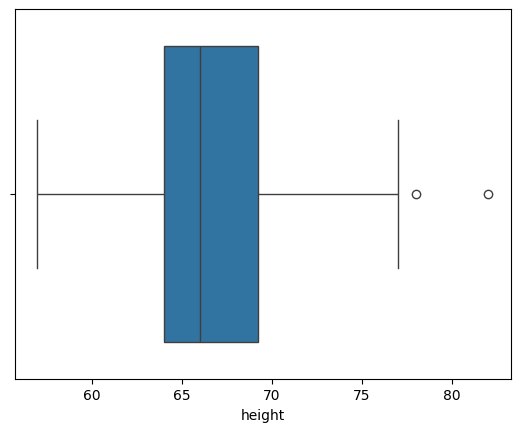

In [18]:
sns.boxplot(customers["height"], orient="h")

Die Boxplots sind nützlich, wenn wir die Verteilung einer Variablen in verschiedenen Gruppen vergleichen wollen. Als Beispiel können wir die Verteilung der Größe in verschiedenen ethnischen Gruppen vergleichen.

<Axes: xlabel='height', ylabel='ethnicity'>

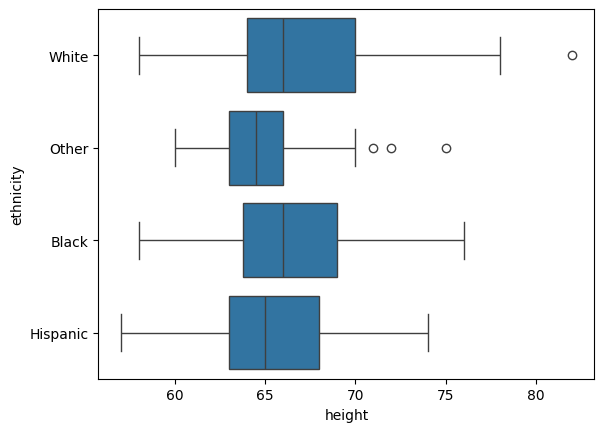

In [19]:
sns.boxplot(x = customers["height"], y = customers["ethnicity"])

## Zusammenfassung kategorialer Variablen

Der Mittelwert und die Standardabweichung machen nur für Variablen Sinn, für die Addition und Multiplikation sinnvoll sind. Insbesondere machen sie keinen Sinn für kategoriale Variablen, z. B. die Ethnie der Kunden.

Die wichtigste Zusammenfassung für kategoriale Variablen ist die Häufigkeitstabelle. Eine Häufigkeitstabelle zeigt die Anzahl der Beobachtungen für jede Kategorie. Die relative Häufigkeitstabelle zeigt den Anteil der Beobachtungen für jede Kategorie.


In [20]:
customers["ethnicity"].value_counts()

ethnicity
White       1494
Black        180
Hispanic     104
Other         38
Name: count, dtype: int64

<Axes: xlabel='ethnicity', ylabel='count'>

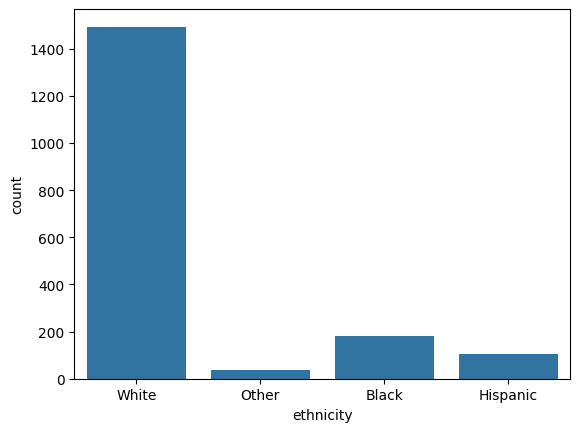

In [21]:
sns.countplot(data = customers, x="ethnicity")

## Datentransformationen

Es ist in fast jeder Analyse notwendig, die Daten zu transformieren. Als Beispiel können wir die Größe in Inch in Zentimeter umrechnen. Die Umrechnung von Inch in Zentimeter erfolgt durch Multiplikation mit 2,54. Die Umrechnung von Pfund in Kilogramm erfolgt durch Multiplikation mit 0,45.

In [22]:
# Hier erstellen wir eine neue Spalte, die die Größe in cm enthält
customers["height_cm"] = customers["height"] * 2.54

In [23]:
# Erstellen Sie eine neue Spalte "weight_kg" in dem Dataframe "customers", die die Werte der Spalte "weight" in Kilogramm umrechnet.
# 1 Pfund entspricht 0.453592 Kilogramm.


Häufig möchten wir eine stetige Variable in Kategorien einteilen. Zum Beispiel möchten wir eine Variable erstellen, die angibt, ob eine Person jünger als 30 Jahre ist oder nicht. Dies ist eine binäre Variable, die wir aus einer kontinuierlichen Variable erstellen.

In [24]:
customers["is_under_30"] = customers["age"] < 30
customers[["age", "is_under_30"]].head()

,age,is_under_30
0,45,False
1,58,False
2,29,True
3,57,False
4,91,False


Falls wir mehr als zwei Kategorien brauchen, bietet die Funktion `pd.cut` die Möglichkeit, die Daten in Kategorien einzuteilen.

In [27]:
# Wir lassen uns die Häufigkeitsverteilung der Altersgruppen ausgeben,
# um zu sehen, wie pd.cut funktioniert

pd.cut(
    customers["age"],
    bins=[0, 30, 64, np.inf],
).value_counts()

age
(30.0, 64.0]    1041
(0.0, 30.0]      512
(64.0, inf]      263
Name: count, dtype: int64

In [28]:
# Hier weisen wir Etiketten der Kategorien und speichern das Ergebnis in einer neuen Spalte "age_group"

customers["age_group"] = pd.cut(
    customers["age"],
    bins=[0, 30, 64, np.inf],
    labels=["<30", "30-64", "65+"]
)

# Als Kontrolle lassen wir uns die ersten 5 Zeilen des Dataframes anzeigen
customers[["age", "age_group"]].head()

,age,age_group
0,45,30-64
1,58,30-64
2,29,<30
3,57,30-64
4,91,65+


## Aufgabe 

Berechnen Sie den BMI (Body Mass Index) für die Kunden. Der BMI ist definiert als das Körpergewicht in Kilogramm geteilt durch das Quadrat der Größe in Metern. Das Gewicht muss in Kilogramm und die Größe in Metern sein.

In [27]:
# Erstellen Sie die Spalte "bmi" in dem Dataframe "customers", die den Body Mass Index berechnet.

customers["bmi"] = customers["weight"] / (customers["height"] / 100) ** 2

Die [Referenzwerte](https://www.cdc.gov/healthyweight/assessing/index.html) für den BMI sind:

- Unter 18,5: Untergewicht
- 18,5 - 24,9: Normalgewicht
- 25 - 29,9: Übergewicht
- 30 oder mehr: Adipositas

- Ein Verkäufer behauptet, daß die Kunden im Einkaufszentrum im Durchschnitt übergewichtig sind. Überprüfen Sie diese Behauptung anhand der Daten.
- Ein anderer Verkäufer behauptet, daß mehr als ein Viertel der Besucher im Einkaufszentrum adipös sind. Überprüfen Sie diese Behauptung anhand der Daten.

In [28]:
# Berechnen Sie den durchschnittlichen BMI

customers["bmi"].mean()

351.1234041165582

In [29]:
# Lassen Sie sich die Beschreibung der Spalte "bmi" anzeigen. (Tipp: Verwenden Sie die Methode .describe() der Spalte "bmi").

customers["bmi"].describe()

count    1789.000000
mean      351.123404
std        65.866606
min       163.265306
25%       307.478675
50%       340.136054
75%       378.703497
max       761.862330
Name: bmi, dtype: float64

Erstellen Sie eine neue Spalte `is_underweight` in der Tabelle `customers`, die angibt, ob ein Kunde untergewichtig ist oder nicht. Erstellen Sie eine weitere Spalte 
`is_normal` in der Tabelle `customers`, die angibt, ob ein Kunde ein Normalgewicht hat oder nicht.

*Hinweis*: Sie können diese Variable mit den logischen Operatoren `<`, `<=`, `>`, `>=` und `==` erstellen. Logische Operationen können Sie mit den Operatoren `&` (und), `|` (oder) und `~` (nicht) verknüpfen (Hinweis: hier brauchen Sie `und`).


In [30]:
# Erstellen Sie die zwei Variablen hier

customers["is_overweight"] = customers["bmi"] > 25

Wie viele Kunden sind untergewichtig? Wie viele Kunden haben ein Normalgewicht? *Hinweis*: Benutzen Sie die Methode `value_counts` um die Anzahl der Kunden in jeder Kategorie zu berechnen. Sie können auch die Methode `sum` benutzen, um die Anzahl der Kunden in einer Kategorie zu berechnen.

In [31]:
# Wie viele Kunden sind untergewichtig?
# a) mit .value_counts()

# b) mit .sum()


Erstellen Sie eine neue Spalte `bmi_category` in der Tabelle `customers`, die die Kategorie des BMI angibt (Untergewicht, Normalgewicht, Übergewicht, Adipositas).
*Hinweis*: Sie können diese Variable mit der Funktion `pd.cut` erstellen.

In [32]:
# Erstellen Sie `bmi_category` hier


Visualisieren Sie die Verteilung der Kategorien des BMI. *Hinweis*: Benutzen Sie die Funktion `sns.countplot` aus der Bibliothek `seaborn`.

In [33]:
# Erstellen Sie die Graphik hier


Nun möchten Wir die Verteilung des BMI für Männer und Frauen vergleichen. Berechnen Sie den Mittelwert des BMI für Männer und Frauen. *Hinweis*: Sie können die Methode `groupby` benutzen, um die Mittelwerte für verschiedene Gruppen zu berechnen.

In [34]:
# Als Beispiel für die Benutzung von .groupby() werden hier die Mittelwerte des Alters für jede Ethnie berechnet

customers.groupby("ethnicity")["age"].mean()

ethnicity
Black       41.733333
Hispanic    36.288462
Other       41.763158
White       43.571620
Name: age, dtype: float64

In [35]:
# Berechnen Sie die Mittelwerte des BMI für Männer und Frauen.


In [29]:
# Vergleichen Sie die Verteilungen des BMI für Männer und Frauen mit einem Boxplot.

# Bevor wir die Boxplots erstellen, müssen wir die Variable "male" in eine kategorische Variable umwandeln. Die neue Variable nennen wir "sex"
customers["sex"] = pd.Categorical(customers["male"], ordered=False)

# Erstellen Sie die Boxplots hier
